In [2]:
import pandas as pd
import numpy as np
import random
import math
#libraries that we need

Load the CSV file into a pandas DataFrame

In [3]:
def load_csv(filename):
    return pd.read_csv(filename)

Split the dataset randomly into training and testing sets

In [4]:
def split_dataset(dataset, split_ratio):
    shuffled_indices = np.random.permutation(len(dataset))
    print(shuffled_indices)
    train_size = int(len(dataset) * split_ratio)
    train_indices = shuffled_indices[:train_size]
    test_indices = shuffled_indices[train_size:]
    train_set = dataset.iloc[train_indices]
    test_set = dataset.iloc[test_indices]
    print(type(train_set))
    return train_set, test_set

Calculate the Euclidean distance between two instances

In [5]:
def euclidean_distance(instance1, instance2):
    distance = np.sum((instance1 - instance2) ** 2)
    return math.sqrt(distance)

Get the K nearest neighbors for a given test instance


In [6]:
def get_neighbors(train_set, test_instance, k):
    distances = train_set.iloc[:, :-1].apply(lambda x: euclidean_distance(x, test_instance), axis=1)
    neighbors = train_set.iloc[distances.argsort()[:k]]
    return neighbors

Make predictions based on the majority vote of neighbors




In [7]:
def get_response(neighbors):
    return neighbors['LeaveOrNot'].mode().values[0]

Evaluate the accuracy of the model

In [8]:
def get_accuracy(test_set, predictions):
    correct = sum(test_set['LeaveOrNot'] == predictions)
    return (correct / float(len(test_set))) * 100.0

Load the dataset and split it into training and testing sets

In [11]:
filename = "Employee.csv"
dataset = load_csv(filename)
dataset.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Conver non numeric columns to numeric values

In [12]:
dataset['edu'] = pd.factorize(dataset['Education'])[0]
dataset['cty'] = pd.factorize(dataset['City'])[0]
dataset['sex'] = pd.factorize(dataset['Gender'])[0]
dataset['evrbnch'] = pd.factorize(dataset['EverBenched'])[0]
#split the numeric columns for the algorithm
dataset=dataset[['edu','JoiningYear','cty','PaymentTier','sex','evrbnch','ExperienceInCurrentDomain','LeaveOrNot']]
dataset.head()

,edu,JoiningYear,cty,PaymentTier,sex,evrbnch,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,0,0,0,0
1,0,2013,1,1,1,0,3,1
2,0,2014,2,3,1,0,2,0
3,1,2016,0,3,0,0,5,1
4,1,2017,1,3,0,1,2,1


array([[<Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

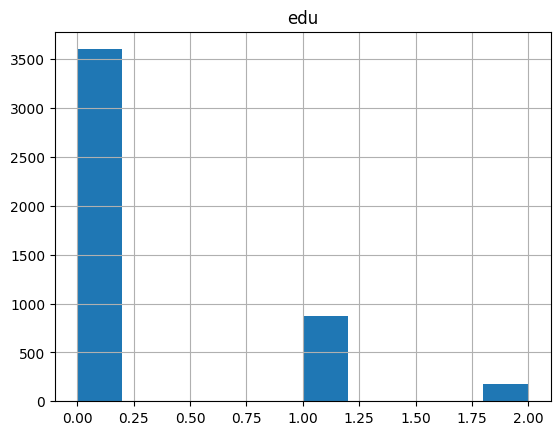

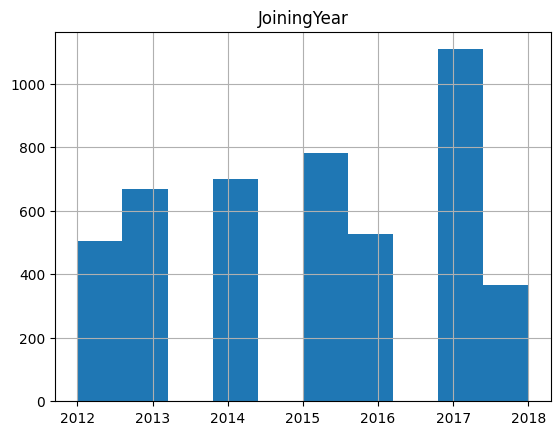

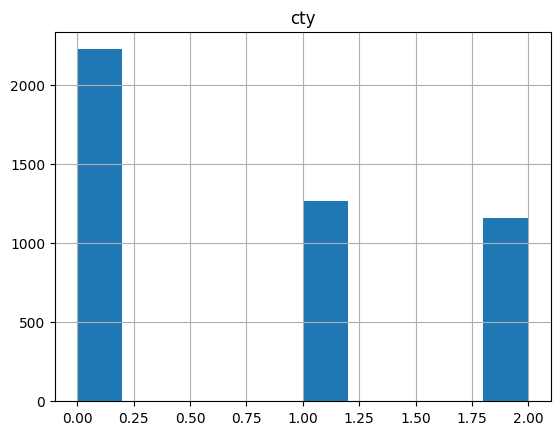

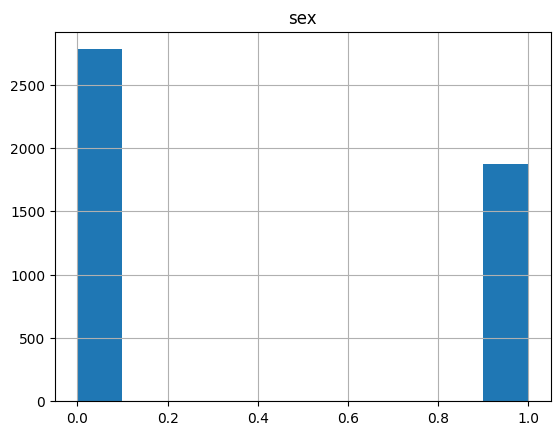

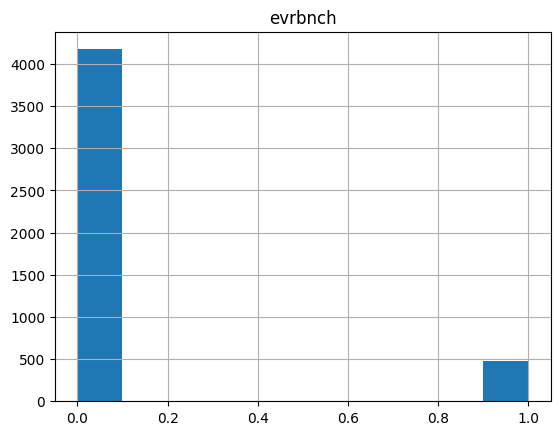

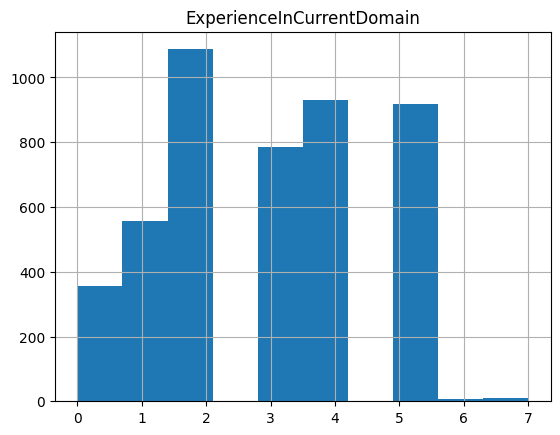

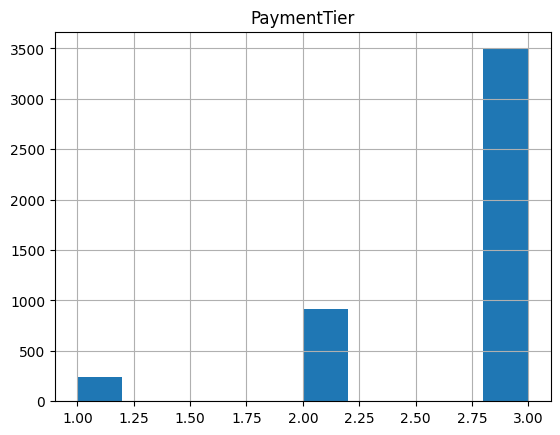

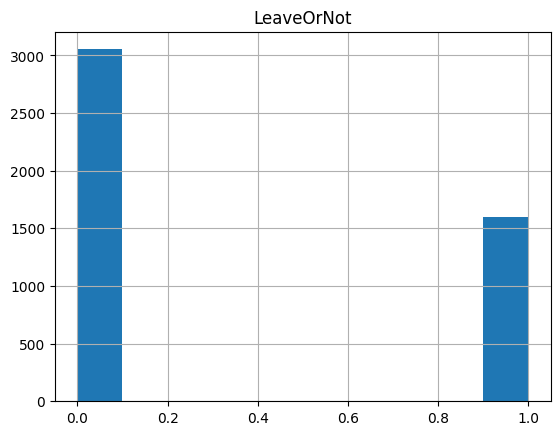

In [13]:
dataset.hist(column='edu')
dataset.hist(column='JoiningYear')
dataset.hist(column='cty')
dataset.hist(column='sex')
dataset.hist(column='evrbnch')
dataset.hist(column='ExperienceInCurrentDomain')
dataset.hist(column='PaymentTier')
dataset.hist(column='LeaveOrNot')

intial split ratio

In [14]:
split_ratio = 0.8
train_set, test_set = split_dataset(dataset, split_ratio)

[3223 1992 3478 ... 1373 2661 2604]
<class 'pandas.core.frame.DataFrame'>


Convert the DataFrame to numpy arrays

In [15]:
train_X = train_set.iloc[:, :-1].values
train_y = train_set.iloc[:, -1].values
test_X = test_set.iloc[:, :-1].values
test_y = test_set.iloc[:, -1].values

*Create* predictions using KNN and evaluate the accuracy

In [18]:
k=3
predictions=[]
for test_instance in test_X:
    neighbors = get_neighbors(train_set, test_instance, k)

    result = get_response(neighbors)

    predictions.append(result)

accuracy = get_accuracy(test_set, predictions)
print("Accuracy: %.2f%%" % accuracy)

Accuracy: 80.34%
